In [289]:
# @hidden_cell
# The project token is an authorization token that is used to access project resources like data sources, connections, and used by platform APIs.
from project_lib import Project
key = 'key'
project = Project(project_id=key, project_access_token=key)
pc = project.project_context


# MARATÓN BEHIND THE CODE 2020

# DESAFÍO 8 - Digital House

El reto de Digital House tiene que ver con la misión y visión de la empresa; la cual busca transformar la vida de las personas, desarrollando competencias digitales, para que generen un impacto positivo en la sociedad. En ese sentido, Digital House busca a través de este desafío medir la empleabilidad de los cursos que disponibiliza en su plataforma, es decir que tan factible es que un alumno o egresado de Digital House acceda al mercado laboral o consiga un trabajo en su área luego de finalizar uno o varios de los cursos ofrecidos en la plataforma.

Entender que características o variables hacen que una persona sea más o menos empleable es fundamental para la empresa y para generar ese impacto positivo que busca aportar a la sociedad

<hr>

## Instalación de algunas bibliotecas de Python

In [290]:
!pip install scikit-learn --upgrade
!pip install scipy --upgrade
import numpy as np


Requirement already up-to-date: scikit-learn in /opt/conda/envs/Python36/lib/python3.6/site-packages (0.23.2)
Requirement already up-to-date: scipy in /opt/conda/envs/Python36/lib/python3.6/site-packages (1.5.2)


<hr>

## Descargue el conjunto de datos del desafío en formato .csv

In [291]:
import pandas as pd
import seaborn as sns
import xgboost as xgb

!wget --no-check-certificate --content-disposition https://raw.githubusercontent.com/vanderlei-test/654986294958/master/train_dataset_digitalhouse.csv
df_training_dataset = pd.read_csv(r'train_dataset_digitalhouse.csv')
df_training_dataset.tail()

--2020-09-18 14:57:52--  https://raw.githubusercontent.com/vanderlei-test/654986294958/master/train_dataset_digitalhouse.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.48.133
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.48.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 654532 (639K) [text/plain]
Saving to: ‘train_dataset_digitalhouse.csv.7’

100%[======================================>] 654,532     --.-K/s   in 0.02s   

2020-09-18 14:57:52 (32.4 MB/s) - ‘train_dataset_digitalhouse.csv.7’ saved [654532/654532]



,Unnamed: 0,EDAD,GENERO,RESIDENCIA,NV_ESTUDIO,ESTUDIO_PREV,TRACK_DH,AVG_DH,MINUTES_DH,EXPERIENCIA,DIAS_EMP
8990,9995,29.0,MASCULINO,ARGENTINA,TERTIARY,DEVELOPMENT,NaN,4.0,4701.6,9.1,86.0
8991,9996,34.0,NaN,ARGENTINA,UNIVERSITARY,ENGINEERING,PROGRAMACION,3.4,4646.2,16.8,95.0
8992,9997,28.0,FEMENINO,ARGENTINA,POST_GRADUATE,ENGINEERING,EJECUTIVO,NaN,3315.1,5.6,95.0
8993,9998,23.0,MASCULINO,MEXICO,TERTIARY,ENGINEERING,PROGRAMACION,3.3,4437.8,0.9,87.0
8994,9999,36.0,MASCULINO,ARGENTINA,UNIVERSITARY,COMMERCIAL,DATA,3.4,4600.8,19.6,88.0


In [292]:
df_training_dataset.describe()

,Unnamed: 0,EDAD,AVG_DH,MINUTES_DH,EXPERIENCIA,DIAS_EMP
count,8995.000000,7668.000000,7651.000000,7619.000000,7618.000000,8995.000000
mean,5499.806115,33.989176,3.503228,4419.936461,16.112497,90.807449
std,2598.235516,5.024501,0.404276,524.528119,7.154829,5.675932
min,1000.000000,15.000000,2.100000,889.300000,0.000000,79.000000
25%,3249.500000,31.000000,3.200000,4345.850000,10.825000,86.000000
50%,5500.000000,34.000000,3.500000,4575.300000,16.200000,90.000000
75%,7749.500000,37.000000,3.800000,4676.100000,21.600000,95.000000
max,9999.000000,52.000000,4.900000,7466.500000,31.900000,115.000000


## En el conjunto de datos proporcionado, tenemos las siguientes columnas:

* Unnamed: 0
* EDAD
* GENERO
* RESIDENCIA
* NV_ESTUDIO
* ESTUDIO_PREV
* TRACK_DH
* AVG_DH
* MINUTES_DH
* EXPERIENCIA
* **DIAS_EMP = El valor "target" que se va a predecir**

Podemos verificar fácilmente que faltan valores usando el siguiente código:

```df_training_dataset.info()```

Debe manejar cuidadosamente estos valores faltantes antes de crear un modelo de regresión.

In [293]:
df_training_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8995 entries, 0 to 8994
Data columns (total 11 columns):
Unnamed: 0      8995 non-null int64
EDAD            7668 non-null float64
GENERO          7620 non-null object
RESIDENCIA      7638 non-null object
NV_ESTUDIO      7623 non-null object
ESTUDIO_PREV    7665 non-null object
TRACK_DH        7714 non-null object
AVG_DH          7651 non-null float64
MINUTES_DH      7619 non-null float64
EXPERIENCIA     7618 non-null float64
DIAS_EMP        8995 non-null float64
dtypes: float64(5), int64(1), object(5)
memory usage: 773.1+ KB


<hr>

## Algunos consejos antes de entrenar a un modelo:

1. Manejar valores perdidos

2. Manejar variables categóricas

<hr>

## A continuación, le brindamos una plantilla simple para que sepa cómo estructurar las entradas y salidas de su modelo

### Removiendo columnas

In [294]:
df_training_dataset_1 = df_training_dataset.drop(columns=['Unnamed: 0',], inplace=False)
df_training_dataset_1.tail()
df_training = df_training_dataset_1
df_training_dataset_1 = df_training_dataset_1.dropna(how='all', subset=['EXPERIENCIA', 'EDAD'])
dfSinNullsEnExperiencia = df_training.dropna(how='any', subset=['EXPERIENCIA', 'EDAD'])

df_training_dataset_1 = df_training_dataset_1.dropna(how='all', subset=['AVG_DH','MINUTES_DH'])
dfSinNullsEnMinutes = df_training.dropna(how='any', subset=['AVG_DH','MINUTES_DH'])

### Removendo valores NaN

In [295]:
df_training_dataset_2 = df_training_dataset_1
df_training_dataset_2.tail()

,EDAD,GENERO,RESIDENCIA,NV_ESTUDIO,ESTUDIO_PREV,TRACK_DH,AVG_DH,MINUTES_DH,EXPERIENCIA,DIAS_EMP
8990,29.0,MASCULINO,ARGENTINA,TERTIARY,DEVELOPMENT,NaN,4.0,4701.6,9.1,86.0
8991,34.0,NaN,ARGENTINA,UNIVERSITARY,ENGINEERING,PROGRAMACION,3.4,4646.2,16.8,95.0
8992,28.0,FEMENINO,ARGENTINA,POST_GRADUATE,ENGINEERING,EJECUTIVO,NaN,3315.1,5.6,95.0
8993,23.0,MASCULINO,MEXICO,TERTIARY,ENGINEERING,PROGRAMACION,3.3,4437.8,0.9,87.0
8994,36.0,MASCULINO,ARGENTINA,UNIVERSITARY,COMMERCIAL,DATA,3.4,4600.8,19.6,88.0


In [296]:
df_training_dataset_2.columns

Index(['EDAD', 'GENERO', 'RESIDENCIA', 'NV_ESTUDIO', 'ESTUDIO_PREV',
       'TRACK_DH', 'AVG_DH', 'MINUTES_DH', 'EXPERIENCIA', 'DIAS_EMP'],
      dtype='object')

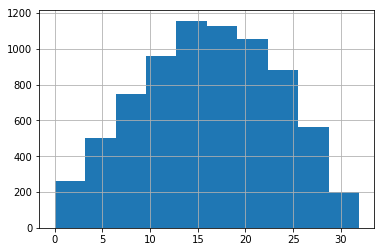

In [297]:
df_training_dataset_2.EXPERIENCIA.hist()


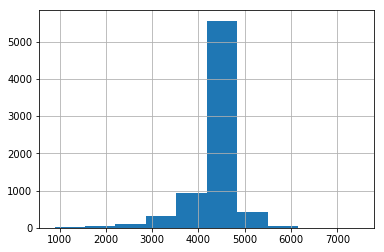

In [298]:

df_training_dataset_2.MINUTES_DH.hist()


In [299]:
df_training_dataset_2.MINUTES_DH.mean()

4419.84178403757

In [300]:
df_training_dataset_2.columns

Index(['EDAD', 'GENERO', 'RESIDENCIA', 'NV_ESTUDIO', 'ESTUDIO_PREV',
       'TRACK_DH', 'AVG_DH', 'MINUTES_DH', 'EXPERIENCIA', 'DIAS_EMP'],
      dtype='object')

In [301]:
from sklearn.ensemble import GradientBoostingRegressor


In [302]:
# from sklearn.impute import MissingIndicator
# indicator = MissingIndicator(missing_values=np.NaN)
# missing = indicator.fit_transform(df_training_dataset_2)
dfEntrenamientoMissValues = df_training_dataset_2.dropna()
# df_training_dataset_2 = df_training_dataset_2.dropna()

from sklearn.ensemble import GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
imputerCalculado = GradientBoostingRegressor()
calculadorDeEdad = GradientBoostingRegressor(learning_rate=0.05).fit(dfSinNullsEnExperiencia[['EXPERIENCIA']], dfSinNullsEnExperiencia[['EDAD']])
calculadorDeExperiencia = GradientBoostingRegressor(learning_rate=0.05).fit(dfSinNullsEnExperiencia[['EDAD']], dfSinNullsEnExperiencia[['EXPERIENCIA']])
calculadorDeMinutos = GradientBoostingRegressor(learning_rate=0.05).fit(dfSinNullsEnMinutes[['AVG_DH']], dfSinNullsEnMinutes[['MINUTES_DH']])
calculadorDeAvg = GradientBoostingRegressor(learning_rate=0.05).fit(dfSinNullsEnMinutes[['MINUTES_DH']], dfSinNullsEnMinutes[['AVG_DH']])



/opt/conda/envs/Python36/lib/python3.6/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/opt/conda/envs/Python36/lib/python3.6/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/opt/conda/envs/Python36/lib/python3.6/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/opt/conda/envs/Python36/lib/python3.6/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), 

In [303]:

df = df_training_dataset_2

In [304]:
# df['EXPERIENCIA'].fillna(-1)
# df['EDAD'].fillna(-1, inplace=True)
# df['MINUTES_DH'].fillna(-1, inplace=True)
# df['AVG_DH'].fillna(-1, inplace=True)
from sklearn.impute import SimpleImputer
import numpy as np
from sklearn.impute import KNNImputer
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

columnasNumericas=['EDAD', 'AVG_DH', 'MINUTES_DH', 'EXPERIENCIA']




# impute_zeros = IterativeImputer(
#    estimator=imputerCalculado,random_state=0
# )
# # impute_zeros.fit(X=dfEntrenamientoMissValues[columnasNumericas])
# df_training_dataset_2[columnasNumericas]=impute_zeros.fit_transform(X=df_training_dataset_2[columnasNumericas])

In [305]:
# edadNula = df_training_dataset_2[df_training_dataset_2.MINUTES_DH.isna()]

In [306]:
# edadNula.describe()

In [307]:
df_training_dataset_2['EDAD_CALCULADA'] =  calculadorDeEdad.predict(df[['EXPERIENCIA']].fillna(16))
df_training_dataset_2['EXPERIENCIA_CALCULADA'] =  calculadorDeExperiencia.predict(df[['EDAD']].fillna(33))
df_training_dataset_2['MINUTES_DH_CALCULADA'] =  calculadorDeMinutos .predict(df[['AVG_DH']].fillna(3.5))
df_training_dataset_2['AVG_DH_CALCULADA'] =  calculadorDeAvg.predict(df[['MINUTES_DH']].fillna(4400))


In [308]:
df_training_dataset_2['EDAD'].fillna(df_training_dataset_2.EDAD_CALCULADA, inplace=True)
df_training_dataset_2['EXPERIENCIA'].fillna(df_training_dataset_2.EXPERIENCIA_CALCULADA, inplace=True)
df_training_dataset_2['MINUTES_DH'].fillna(df_training_dataset_2.MINUTES_DH_CALCULADA, inplace=True)
df_training_dataset_2['AVG_DH'].fillna(df_training_dataset_2.AVG_DH_CALCULADA, inplace=True)


In [309]:
df_training_dataset_2 = df_training_dataset_2.drop(columns=['EDAD_CALCULADA', 'EXPERIENCIA_CALCULADA', 'MINUTES_DH_CALCULADA', 'AVG_DH_CALCULADA'], inplace=False)

In [310]:
dff = df_training_dataset_2.dropna(how='all', subset=['AVG_DH','MINUTES_DH', 'EXPERIENCIA','EDAD'])


In [311]:
# df_training_dataset_2["EDAD"] = np.where(df_training_dataset_2["EDAD"]>45.0, 45.0,df_training_dataset_2['EDAD'])
# df_training_dataset_2["EDAD"] = np.where(df_training_dataset_2["EDAD"]<20.0, 20.0,df_training_dataset_2['EDAD'])
# df_training_dataset_2["AVG_DH"] = np.where(df_training_dataset_2["AVG_DH"]>4.5, 4.5,df_training_dataset_2['AVG_DH'])
# df_training_dataset_2["AVG_DH"] = np.where(df_training_dataset_2["AVG_DH"]<2.5, 2.5,df_training_dataset_2['AVG_DH'])
# df_training_dataset_2["MINUTES_DH"] = np.where(df_training_dataset_2["MINUTES_DH"]>5500, 5500,df_training_dataset_2['MINUTES_DH'])
# df_training_dataset_2["MINUTES_DH"] = np.where(df_training_dataset_2["MINUTES_DH"]<3000, 3000,df_training_dataset_2['MINUTES_DH'])

In [312]:
df_training_dataset_2

,EDAD,GENERO,RESIDENCIA,NV_ESTUDIO,ESTUDIO_PREV,TRACK_DH,AVG_DH,MINUTES_DH,EXPERIENCIA,DIAS_EMP
0,37.000000,FEMENINO,BRAZIL,UNIVERSITARY,NaN,PROGRAMACION,3.100000,4131.500000,21.300000,97.0
1,40.000000,FEMENINO,NaN,UNIVERSITARY,COMMERCIAL,PROGRAMACION,3.100000,4160.400000,25.200000,102.0
2,35.000000,NaN,ARGENTINA,UNIVERSITARY,DEVELOPMENT,DATA,3.100000,4087.600000,18.000000,89.0
3,33.000000,FEMENINO,BRAZIL,UNIVERSITARY,ENGINEERING,NaN,3.100000,4043.200000,13.600000,96.0
4,29.000000,NaN,BRAZIL,UNIVERSITARY,DEVELOPMENT,NaN,3.600000,4688.000000,8.398846,83.0
5,28.000000,FEMENINO,ARGENTINA,UNIVERSITARY,MARKETING,DATA,3.254768,4369.300000,7.000000,101.0
6,35.000000,MASCULINO,ARGENTINA,NaN,ENGINEERING,DATA,3.000000,3871.289232,18.000000,86.0
7,35.000000,MASCULINO,MEXICO,UNIVERSITARY,ENGINEERING,PROGRAMACION,3.816544,4733.000000,18.800000,87.0
8,41.000000,MASCULINO,ARGENTINA,NaN,ENGINEERING,NaN,3.495127,4545.300000,25.500000,90.0
9,24.386759,NaN,MEXICO,UNIVERSITARY,COMMERCIAL,DATA,2.900000,3499.300000,2.500000,83.0


In [313]:
import seaborn as sns, numpy as np
import matplotlib.pyplot as plt

In [314]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MaxAbsScaler
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import Normalizer
from sklearn.preprocessing import QuantileTransformer
from sklearn.preprocessing import PowerTransformer




scaler = MinMaxScaler()
maxAbs = RobustScaler()
# df_training_dataset_2[columnasNumericas]=maxAbs.fit_transform(df_training_dataset_2[columnasNumericas])

df_training_dataset_2[columnasNumericas]=scaler.fit_transform(df_training_dataset_2[columnasNumericas])


In [315]:
df_training_dataset_2.describe()

,EDAD,AVG_DH,MINUTES_DH,EXPERIENCIA,DIAS_EMP
count,8621.000000,8621.000000,8621.000000,8621.000000,8621.000000
mean,0.512473,0.499841,0.536771,0.503955,90.788888
std,0.135338,0.144008,0.080176,0.223088,5.671128
min,0.000000,0.000000,0.000000,0.000000,79.000000
25%,0.431072,0.392857,0.525087,0.338558,86.000000
50%,0.513514,0.500000,0.560877,0.510972,90.000000
75%,0.594595,0.607143,0.574971,0.673981,95.000000
max,1.000000,1.000000,1.000000,1.000000,115.000000


In [316]:
from sklearn.impute import SimpleImputer
from sklearn.impute import KNNImputer

columnasCategoricas=['GENERO', 'RESIDENCIA', 'NV_ESTUDIO', 'ESTUDIO_PREV', 'TRACK_DH']




impute_desconocido = SimpleImputer(
    missing_values=np.nan,
    strategy='constant',
    fill_value='DESCONOCIDO'
)
impute_desconocido.fit(X=df_training_dataset_2[columnasCategoricas])

df_training_dataset_2[columnasCategoricas] = impute_desconocido.transform(X=df_training_dataset_2[columnasCategoricas])






cleanup_nums = {"GENERO": {"MASCULINO":1,
                "FEMENINO":-1, 'DESCONOCIDO':0 }}
df_training_dataset_2.replace(cleanup_nums, inplace=True)


In [317]:
from sklearn.model_selection import cross_val_score


### Codificando variables categóricas

In [318]:
# Columnas One-hot-encoding del dataset usando el metodo de Pandas ``get_dummies`` (demontración)
df_training_dataset_4 = df_training_dataset_2
# df_training_dataset_2[['DIAS_EMP']]=scaler.fit_transform(df_training_dataset_2[['DIAS_EMP']])
df_training_dataset_3 = pd.get_dummies(df_training_dataset_2, columns=[ 'RESIDENCIA', 'NV_ESTUDIO', 'ESTUDIO_PREV', 'TRACK_DH'])
df_training_dataset_3.tail()
dfEntrenamientoMissValues =  pd.get_dummies(dfEntrenamientoMissValues, columns=['GENERO', 'RESIDENCIA', 'NV_ESTUDIO', 'ESTUDIO_PREV', 'TRACK_DH'])

In [319]:
# corrMatrix = df_training_dataset_3[['DIAS_EMP','NV_ESTUDIO_DESCONOCIDO',
#        'NV_ESTUDIO_POST_GRADUATE', 'NV_ESTUDIO_TERTIARY',
#        'NV_ESTUDIO_UNIVERSITARY']].corr()
# fig, ax = plt.subplots(figsize = (30, 30))
# ax.text(0.95, 0.01, 'colored text in axes coords',
#         verticalalignment='bottom', horizontalalignment='right',
#         transform=ax.transAxes,
#         color='green', fontsize=15)
# sns.heatmap(corrMatrix, annot=True)
# plt.show()

In [320]:
from sklearn.model_selection import train_test_split
# train, test = train_test_split(df_training_dataset_3, test_size=0.1, random_state=133, shuffle=True)


### Seleccionando las columnas "features" y "target"

In [321]:
features = [
      'GENERO',
      'EDAD',     
      'AVG_DH', 
      'NV_ESTUDIO_DESCONOCIDO',
      'NV_ESTUDIO_POST_GRADUATE', 
      'NV_ESTUDIO_TERTIARY',
      'ESTUDIO_PREV_BUSINESS',
      'ESTUDIO_PREV_DESCONOCIDO',
      'ESTUDIO_PREV_DEVELOPMENT',
      'ESTUDIO_PREV_ENGINEERING',
      'ESTUDIO_PREV_MARKETING',
    ]
X_train = df_training_dataset_3[
   features
]

y_train = df_training_dataset_3['DIAS_EMP'] 
X_test = df_training_dataset_3[
    
        features
    
]

y_test = df_training_dataset_3['DIAS_EMP']  ## NO CAMBIE EL NOMBRE DE LA VARIABLE "target".

In [322]:
y_train.describe()

count    8621.000000
mean       90.788888
std         5.671128
min        79.000000
25%        86.000000
50%        90.000000
75%        95.000000
max       115.000000
Name: DIAS_EMP, dtype: float64

### Dividiendo el conjunto de datos para una "prueba ciega"

In [323]:
from sklearn.model_selection import train_test_split
# X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=133)
# X_train2, X_test2, y_train2, y_test2 = train_test_split(features2, target2, test_size=0.2, random_state=133)

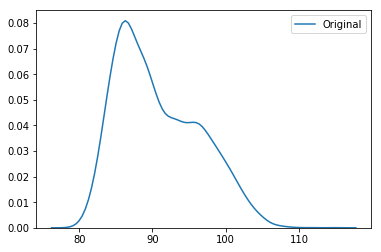

In [324]:
sns.kdeplot(df_training_dataset_3['DIAS_EMP'], label = "Original")

### Entrenando un modelo de regresión lineal simple

In [325]:
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import SGDRegressor
from sklearn.decomposition import PCA
from sklearn.manifold import Isomap
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn import linear_model
from sklearn.linear_model import TweedieRegressor
from sklearn.linear_model import ElasticNetCV
from sklearn import svm
from sklearn.neighbors import KNeighborsRegressor
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import BaggingRegressor
from sklearn.tree import ExtraTreeRegressor
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.dummy import DummyRegressor
from sklearn.neural_network import MLPRegressor  
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import VotingRegressor


regression_model1 = KNeighborsRegressor().fit(X_train, y_train)
regression_model2 = GradientBoostingRegressor(n_estimators=144, learning_rate=0.08, subsample=0.5).fit(X_train, y_train)
regression_model3 = RandomForestRegressor().fit(X_train, y_train)
regression_model4 = LinearRegression().fit(X_train, y_train)
regression_model5 = AdaBoostRegressor().fit(X_train, y_train)
regression_model6 = xgb.XGBRegressor(learning_rate=0.14,colsample_bytree=0.7,subsample=0.7, n_jobs=-1).fit(X_train, y_train)
regression_model7 = RandomForestRegressor().fit(X_train, y_train)
regression_model8 = VotingRegressor([('2', regression_model2),('6',regression_model6) ]).fit(X_train, y_train)
# colsample_bytree=0.7
# max_depth=2



In [326]:
regression_model6.feature_importances_

array([0.15993789, 0.30590063, 0.17701863, 0.04658385, 0.03416149,
       0.06832298, 0.04658385, 0.02173913, 0.02950311, 0.05279503,
       0.05745342], dtype=float32)

In [327]:
# corrMatrix = df_training_dataset_3.corr()
# fig, ax = plt.subplots(figsize = (30, 30))
# ax.text(0.95, 0.01, 'colored text in axes coords',
#         verticalalignment='bottom', horizontalalignment='right',
#         transform=ax.transAxes,
#         color='green', fontsize=15)
# sns.heatmap(corrMatrix, annot=True)
# plt.show()

In [328]:
from pandas import read_csv
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import StratifiedKFold
from sklearn.preprocessing import LabelEncoder
import matplotlib
from matplotlib import pyplot

# # # 26,48

# learning_rate = np.arange(0.005, 0.01, 0.0001)
# n_estimators = range(1, 15, 1)
# max_depth = 3
# parameters = {'min_weight_fraction_leaf':learning_rate} #so called `eta` value
             
# kfold = StratifiedKFold(n_splits=10, shuffle=True, random_state=7)

# grid_search = GridSearchCV(regression_model2, parameters, scoring="r2", n_jobs=-1, cv=kfold)
# grid_result = grid_search.fit(X_train, y_train)
# # summarize results
# print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
# means = grid_result.cv_results_['mean_test_score']
# stds = grid_result.cv_results_['std_test_score']
# params = grid_result.cv_results_['params']
# for mean, stdev, param in zip(means, stds, params):
# 	print("%f (%f) with: %r" % (mean, stdev, param))
# plot
# pyplot.errorbar(1, means, yerr=stds)


### Evaluando el modelo de regresión con el método  "score()" de sklearn

In [329]:
regression_model1.score(X_test, y_test)

0.8465523187652816

In [330]:
regression_model2.score(X_test, y_test)


0.8256252365417597

In [331]:
regression_model3.score(X_test, y_test)

0.9461265265731852

In [332]:
regression_model4.score(X_test, y_test)

0.7907470135787045

In [333]:
regression_model5.score(X_test, y_test)

0.7058431181848854

In [334]:
regression_model6.score(X_test, y_test)

0.8248527208905176

In [335]:
regression_model7.score(X_test, y_test)

0.9463041003404807

In [336]:
regression_model8.score(X_test, y_test)

0.825638847664097

In [337]:
cross_val_score(regression_model6, X_test, y_test, cv=5)

array([0.82392149, 0.81800315, 0.80788047, 0.81424192, 0.81223943])

In [338]:
cross_val_score(regression_model8, X_test, y_test, cv=5)

array([0.82423639, 0.81726685, 0.80864292, 0.81454288, 0.81272526])

In [339]:
cross_val_score(regression_model2, X_test, y_test, cv=5)

array([0.82174729, 0.81672641, 0.80782285, 0.8143252 , 0.81080833])

In [340]:
from matplotlib import pyplot as plt
import numpy as np
X_results = X_test
X_results['Y_PRED'] = regression_model6.predict(X_test)
# X_results['Y_PRED'] = round(X_results['Y_PRED'], )


X_results['Y'] = y_test
X_results['diferencia']= X_test.Y-X_test.Y_PRED
X_results['diferencia_positivo'] = abs(X_results['diferencia'])


/opt/conda/envs/Python36/lib/python3.6/site-packages/ipykernel/__main__.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/opt/conda/envs/Python36/lib/python3.6/site-packages/ipykernel/__main__.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/opt/conda/envs/Python36/lib/python3.6/site-packages/ipykernel/__main__.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/

In [341]:
X_results.diferencia_positivo.mean()

1.681700042416637

In [342]:
y_train.describe()

count    8621.000000
mean       90.788888
std         5.671128
min        79.000000
25%        86.000000
50%        90.000000
75%        95.000000
max       115.000000
Name: DIAS_EMP, dtype: float64

In [343]:
X_results.describe()


,GENERO,EDAD,AVG_DH,NV_ESTUDIO_DESCONOCIDO,NV_ESTUDIO_POST_GRADUATE,NV_ESTUDIO_TERTIARY,ESTUDIO_PREV_BUSINESS,ESTUDIO_PREV_DESCONOCIDO,ESTUDIO_PREV_DEVELOPMENT,ESTUDIO_PREV_ENGINEERING,ESTUDIO_PREV_MARKETING,Y_PRED,Y,diferencia,diferencia_positivo
count,8621.000000,8621.000000,8621.000000,8621.000000,8621.000000,8621.000000,8621.000000,8621.000000,8621.000000,8621.000000,8621.000000,8621.000000,8621.000000,8621.000000,8621.000000
mean,0.318989,0.512473,0.499841,0.152767,0.107992,0.194757,0.022503,0.146619,0.158566,0.428953,0.012064,90.785469,90.788888,0.003621,1.681700
std,0.863865,0.135338,0.144008,0.359783,0.310388,0.396036,0.148322,0.353746,0.365292,0.494955,0.109176,5.121318,5.671128,2.373398,1.674691
min,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,82.203377,79.000000,-7.733658,0.000732
25%,-1.000000,0.431072,0.392857,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,86.617371,86.000000,-1.351234,0.556168
50%,1.000000,0.513514,0.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,89.738831,90.000000,-0.180298,1.201454
75%,1.000000,0.594595,0.607143,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,94.658508,95.000000,1.045135,2.191025
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,109.320503,115.000000,15.726761,15.726761


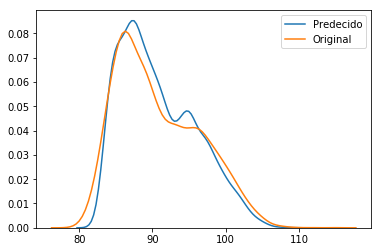

In [344]:
sns.kdeplot(X_results['Y_PRED'], label = "Predecido")
sns.kdeplot(X_results['Y'], label = "Original")



# sns.kdeplot(X_results['diferencia'], label = "Diferencia")

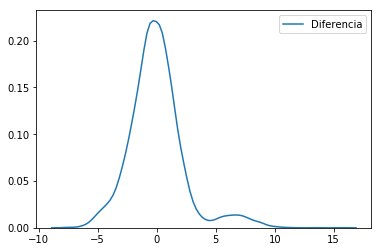

In [345]:
sns.kdeplot(X_results['diferencia'], label = "Diferencia")

In [346]:
X_results.describe()

,GENERO,EDAD,AVG_DH,NV_ESTUDIO_DESCONOCIDO,NV_ESTUDIO_POST_GRADUATE,NV_ESTUDIO_TERTIARY,ESTUDIO_PREV_BUSINESS,ESTUDIO_PREV_DESCONOCIDO,ESTUDIO_PREV_DEVELOPMENT,ESTUDIO_PREV_ENGINEERING,ESTUDIO_PREV_MARKETING,Y_PRED,Y,diferencia,diferencia_positivo
count,8621.000000,8621.000000,8621.000000,8621.000000,8621.000000,8621.000000,8621.000000,8621.000000,8621.000000,8621.000000,8621.000000,8621.000000,8621.000000,8621.000000,8621.000000
mean,0.318989,0.512473,0.499841,0.152767,0.107992,0.194757,0.022503,0.146619,0.158566,0.428953,0.012064,90.785469,90.788888,0.003621,1.681700
std,0.863865,0.135338,0.144008,0.359783,0.310388,0.396036,0.148322,0.353746,0.365292,0.494955,0.109176,5.121318,5.671128,2.373398,1.674691
min,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,82.203377,79.000000,-7.733658,0.000732
25%,-1.000000,0.431072,0.392857,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,86.617371,86.000000,-1.351234,0.556168
50%,1.000000,0.513514,0.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,89.738831,90.000000,-0.180298,1.201454
75%,1.000000,0.594595,0.607143,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,94.658508,95.000000,1.045135,2.191025
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,109.320503,115.000000,15.726761,15.726761


<hr>

## Completar los datos necesarios para entregar la solución

### Como entrega de su solución, esperamos los resultados numéricos predichos por su modelo. Como entrada utilizará el archivo "to_be_scored.csv"

In [347]:
!wget --no-check-certificate --content-disposition https://raw.githubusercontent.com/vanderlei-test/654986294958/master/to_be_scored_digitalhouse.csv
df_to_be_scored = pd.read_csv(r'to_be_scored_digitalhouse.csv')
df_to_be_scored.tail()

--2020-09-18 14:58:13--  https://raw.githubusercontent.com/vanderlei-test/654986294958/master/to_be_scored_digitalhouse.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 199.232.8.133
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|199.232.8.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 67308 (66K) [text/plain]
Saving to: ‘to_be_scored_digitalhouse.csv.1’

100%[======================================>] 67,308      --.-K/s   in 0.004s  

2020-09-18 14:58:13 (17.9 MB/s) - ‘to_be_scored_digitalhouse.csv.1’ saved [67308/67308]



,Unnamed: 0,EDAD,GENERO,RESIDENCIA,NV_ESTUDIO,ESTUDIO_PREV,TRACK_DH,AVG_DH,MINUTES_DH,EXPERIENCIA,Unnamed: 10
995,995,33.0,MASCULINO,ARGENTINA,UNIVERSITARY,COMMERCIAL,PROGRAMACION,3.6,4576.5,15.1,NaN
996,996,40.0,MASCULINO,ARGENTINA,TERTIARY,COMMERCIAL,PROGRAMACION,3.4,4542.9,26.1,NaN
997,997,NaN,FEMENINO,ARGENTINA,UNIVERSITARY,ENGINEERING,DATA,3.4,NaN,27.4,NaN
998,998,NaN,MASCULINO,MEXICO,UNIVERSITARY,ENGINEERING,DATA,3.7,4730.4,1.1,NaN
999,999,36.0,NaN,ARGENTINA,UNIVERSITARY,NaN,PROGRAMACION,3.3,4506.5,20.4,NaN


In [348]:
len(df_to_be_scored)

1000

In [349]:
df_to_be_scored['EDAD_CALCULADA'] =  calculadorDeEdad.predict(df_to_be_scored[['EXPERIENCIA']].fillna(16))
df_to_be_scored['EXPERIENCIA_CALCULADA'] =  calculadorDeExperiencia.predict(df_to_be_scored[['EDAD']].fillna(33))
df_to_be_scored['MINUTES_DH_CALCULADA'] =  calculadorDeMinutos .predict(df_to_be_scored[['AVG_DH']].fillna(3.5))
df_to_be_scored['AVG_DH_CALCULADA'] =  calculadorDeAvg.predict(df_to_be_scored[['MINUTES_DH']].fillna(4400))
df_to_be_scored['EDAD'].fillna(df_to_be_scored.EDAD_CALCULADA, inplace=True)
df_to_be_scored['EXPERIENCIA'].fillna(df_to_be_scored.EXPERIENCIA_CALCULADA, inplace=True)
df_to_be_scored['MINUTES_DH'].fillna(df_to_be_scored.MINUTES_DH_CALCULADA, inplace=True)
df_to_be_scored['AVG_DH'].fillna(df_to_be_scored.AVG_DH_CALCULADA, inplace=True)
df_to_be_scored = df_to_be_scored.drop(columns=['EDAD_CALCULADA', 'EXPERIENCIA_CALCULADA',
 'MINUTES_DH_CALCULADA', 'AVG_DH_CALCULADA'], inplace=False)
df_to_be_scored[columnasNumericas]=scaler.transform(df_to_be_scored[columnasNumericas])
df_to_be_scored[columnasCategoricas] = impute_desconocido.transform(X=df_to_be_scored[columnasCategoricas])
df_to_be_scored.replace(cleanup_nums, inplace=True)
df_to_be_scored = pd.get_dummies(df_to_be_scored, columns=[ 'RESIDENCIA', 'NV_ESTUDIO', 'ESTUDIO_PREV', 'TRACK_DH'])
df_to_be_scored = df_to_be_scored[
    
    features
     
    
]



# ¡Atención!

### El marco de datos ``to_be_scored`` es su "hoja de evaluación". Tenga en cuenta que la columna "target" no existe en esta muestra, por lo que no se puede utilizar para modelos de entrenamiento basados en el aprendizaje supervisado.

# ¡Atención!

### Debes realizar los mismos pasos de procesamiento previo que hiciste en el conjunto de datos de entrenamiento antes de calificar la "hoja de respuestas"

In [350]:
# df_to_be_scored_1 = df_to_be_scored.drop(columns=['Unnamed: 0', 'RESIDENCIA', 'NV_ESTUDIO', 'ESTUDIO_PREV', 'TRACK_DH'], inplace=False)

# df_to_be_scored_2 = df_to_be_scored_1.dropna()

# df_to_be_scored_3 = pd.get_dummies(df_to_be_scored_2, columns=['GENERO'])
# df_to_be_scored_3.tail()

In [351]:
# df_to_be_scored_3.columns

<hr>

### Hacer las predicciones con el método "predict()" de sklearn y agregar los resultados en el marco de datos de la "hoja de evaluación"

In [352]:
y_pred_resultados = regression_model2.predict(df_to_be_scored)
df_to_be_scored['target'] = y_pred_resultados
# df_to_be_scored_3.tail()

In [353]:
df_to_be_scored.describe()

,GENERO,EDAD,AVG_DH,NV_ESTUDIO_DESCONOCIDO,NV_ESTUDIO_POST_GRADUATE,NV_ESTUDIO_TERTIARY,ESTUDIO_PREV_BUSINESS,ESTUDIO_PREV_DESCONOCIDO,ESTUDIO_PREV_DEVELOPMENT,ESTUDIO_PREV_ENGINEERING,ESTUDIO_PREV_MARKETING,target
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,0.302000,0.518840,0.505072,0.142000,0.198000,0.131000,0.037000,0.140000,0.214000,0.347000,0.052000,91.050768
std,0.881801,0.130981,0.140277,0.349225,0.398692,0.337569,0.188856,0.347161,0.410332,0.476254,0.222138,5.228982
min,-1.000000,0.027027,0.071429,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,82.431453
25%,-1.000000,0.432432,0.418133,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,86.780666
50%,1.000000,0.513514,0.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,89.769644
75%,1.000000,0.621622,0.592084,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,95.123754
max,1.000000,0.972973,1.107143,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,108.118793


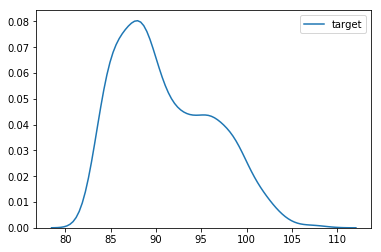

In [354]:
sns.kdeplot(df_to_be_scored['target'], label = "target")


# ¡Atención!

### La columna agregada con los resultados debe llamarse "target", de lo contrario, su envío fallará.

<hr>

### Exportar el marco de datos de resultados como un archivo .csv a su proyecto de Watson Studio.

In [355]:
project.save_data(file_name="results.csv", data=df_to_be_scored.to_csv(index=False))

{'file_name': 'results.csv',
 'message': 'File saved to project storage.',
 'bucket_name': 'desafio8-donotdelete-pr-dkbq6eaugjz0cn',
 'asset_id': '7d823ac0-98f6-49be-89d2-16c0a3252311'}